In [ ]:
#deneme

In [ ]:
# rdflib kütüphanesini içe aktar
from rdflib import Graph

In [ ]:
# Gerekli kütüphaneleri yükle
#!pip install rdflib


In [ ]:
# RDF verisini Turtle formatında tanımla
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

In [ ]:
# RDF verisini dosyaya kaydet
g = Graph()
with open("ontology.ttl", "w") as f:
    f.write(rdf_data)

# Dosyayı parse et
try:
    g.parse("ontology.ttl", format="turtle")
    print("RDF dosyasından başarıyla yüklendi!")
except Exception as e:
    print(f"Hata: {e}")


Hata: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'oe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_Inc. '^b'.\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation ex:I'..."


In [ ]:
# Grafikteki üçlüleri yazdır
print("RDF Grafiğindeki Triples:")
for subj, pred, obj in g:
    print(f"{subj} -- {pred} --> {obj}")


RDF Grafiğindeki Triples:
http://example.org/Role -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasTime -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Event
http://example.org/Location -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasEventType -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Event
http://example.org/hasRole -- http://www.w3.org/2000/01/rdf-schema#domain --> http://example.org/Participant
http://example.org/Venue -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/2000/01/rdf-schema#Class
http://example.org/hasOrganizer -- http://www.w3.org/1999/02/22-rdf-syntax-ns#type --> http://www.w3.org/1999/02/22-rdf-syntax-ns#Property
http://example.org/hasEventType -- http://www.w3.org/2000/01/rdf-schema#range --> http://example.org/EventType
http://example.org/AI_Conference 

In [ ]:
# SPARQL sorgusu yap
query = """
PREFIX ex: <http://example.org/>
SELECT ?event ?location WHERE {
    ?event ex:hasLocation ?location .
}
"""
print("\nSPARQL Sorgu Sonuçları:")
for row in g.query(query):
    print(f"Event: {row.event}, Location: {row.location}")



SPARQL Sorgu Sonuçları:
Event: http://example.org/AI_Conference, Location: http://example.org/Tech_Center


In [ ]:
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

In [ ]:
# NetworkX grafiği oluştur
G = nx.DiGraph()

In [ ]:
# RDF üçlülerini ekle
for subj, pred, obj in g:
    G.add_edge(subj.n3(), obj.n3(), label=pred.n3())

In [ ]:
# Grafik düzeni oluştur
pos = nx.spring_layout(G)

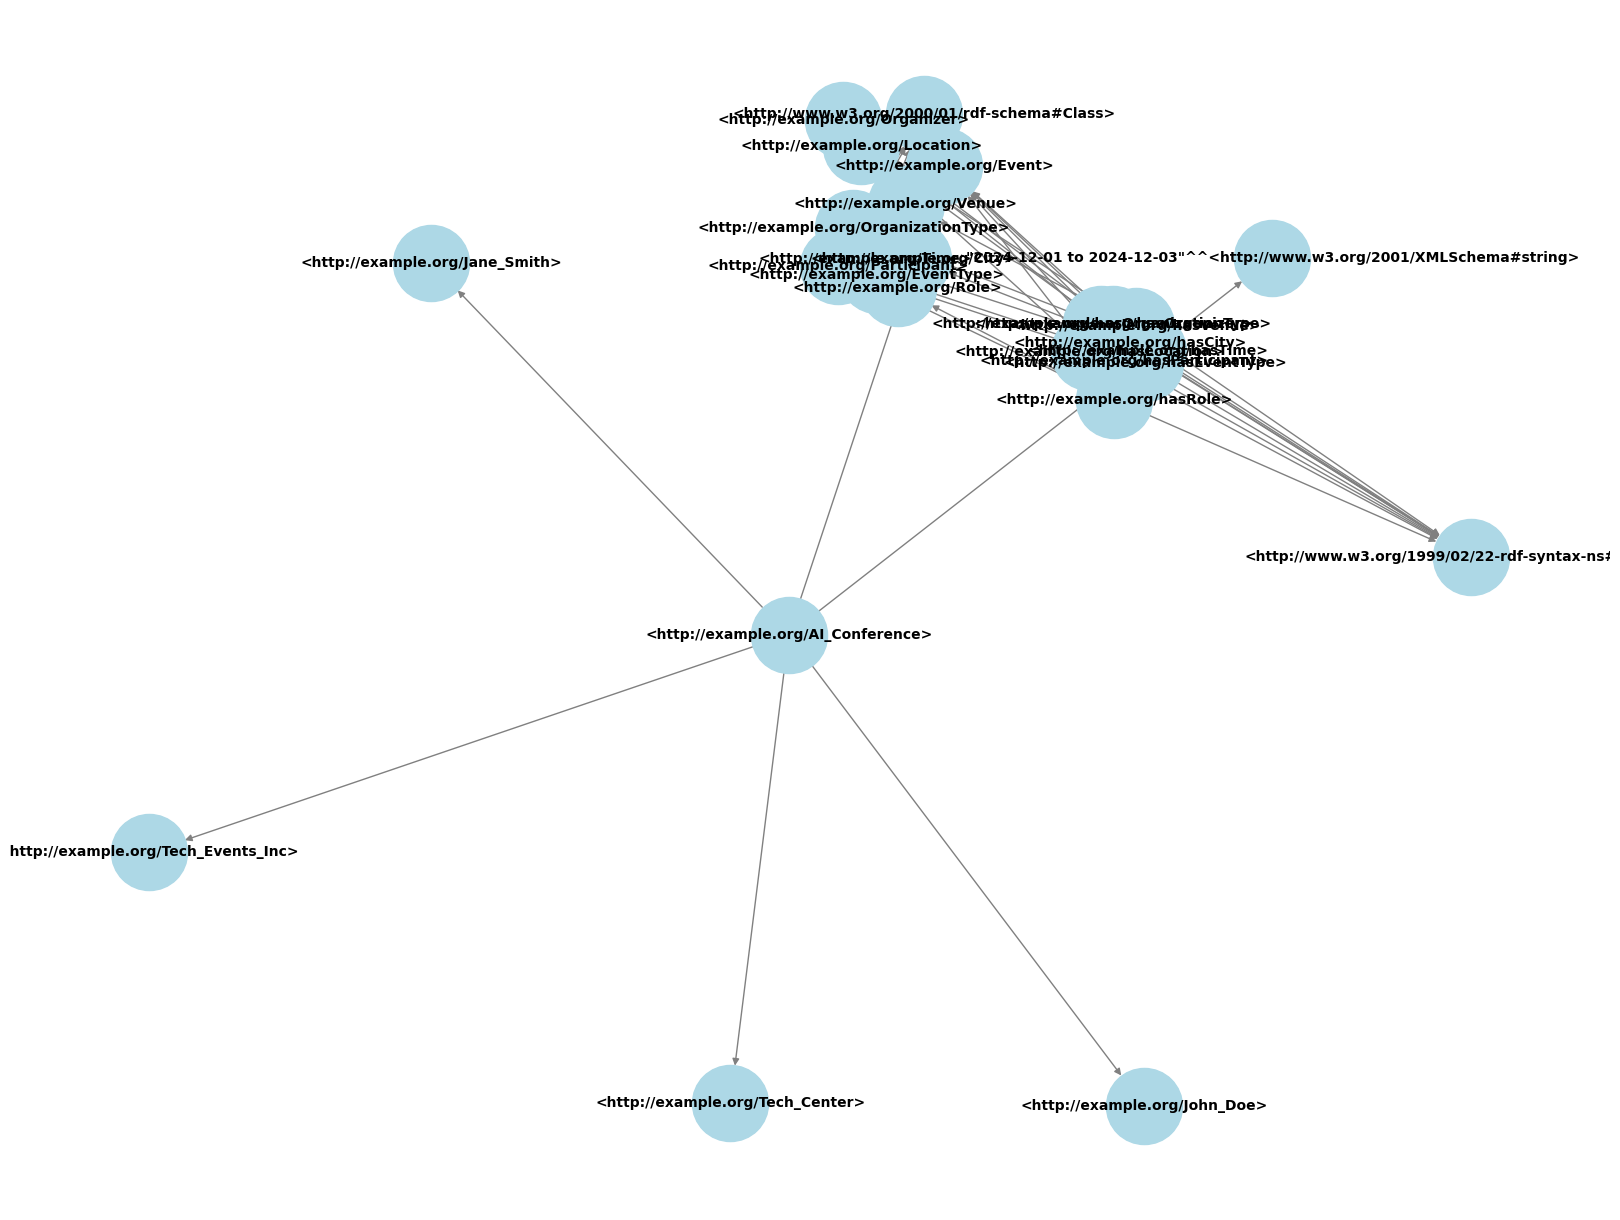

In [ ]:
# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)


{('<http://example.org/Role>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.043419959278789805, 0.24558901541866976, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/hasTime>',
  '<http://example.org/Event>'): Text(0.0873899151461052, 0.16660723708050143, '<http://www.w3.org/2000/01/rdf-schema#domain>'),
 ('<http://example.org/hasTime>',
  '<http://www.w3.org/1999/02/22-rdf-syntax-ns#Property>'): Text(0.34218797045940397, -0.10265026260862299, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/hasTime>',
  '<http://example.org/Time>'): Text(0.048839489711983514, 0.1023718712909063, '<http://www.w3.org/2000/01/rdf-schema#range>'),
 ('<http://example.org/Event>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.020850504900901456, 0.329612152076564, '<http://www.w3.org/1999/02/22-rdf-syntax-ns#type>'),
 ('<http://example.org/Location>',
  '<http://www.w3.org/2000/01/rdf-schema#Class>'): Text(-0.0609668155545676

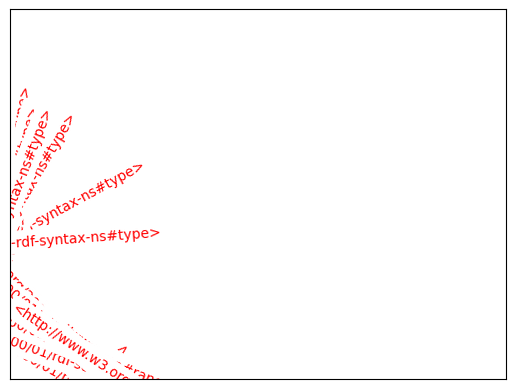

In [ ]:
# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

RDF verisi yüklenirken hata oluştu: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'oe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_Inc. '^b'.\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation ex:I'..."


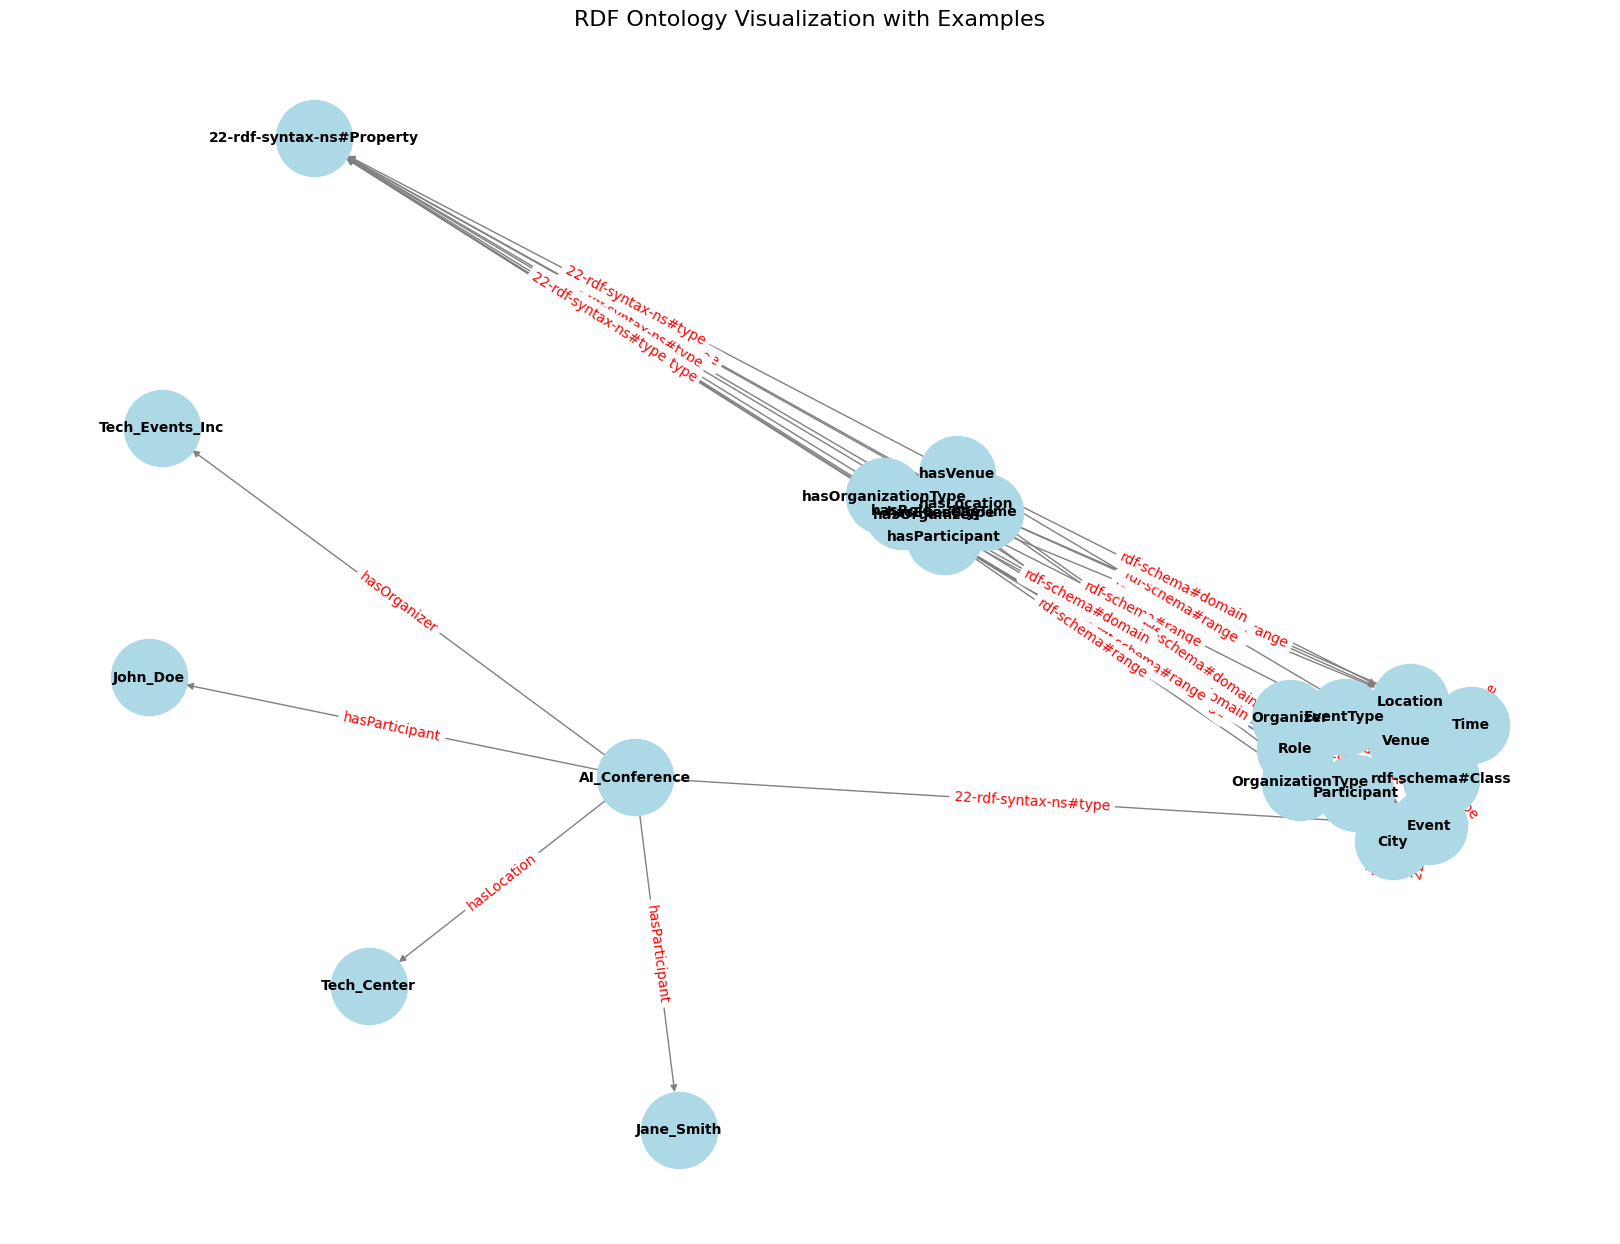

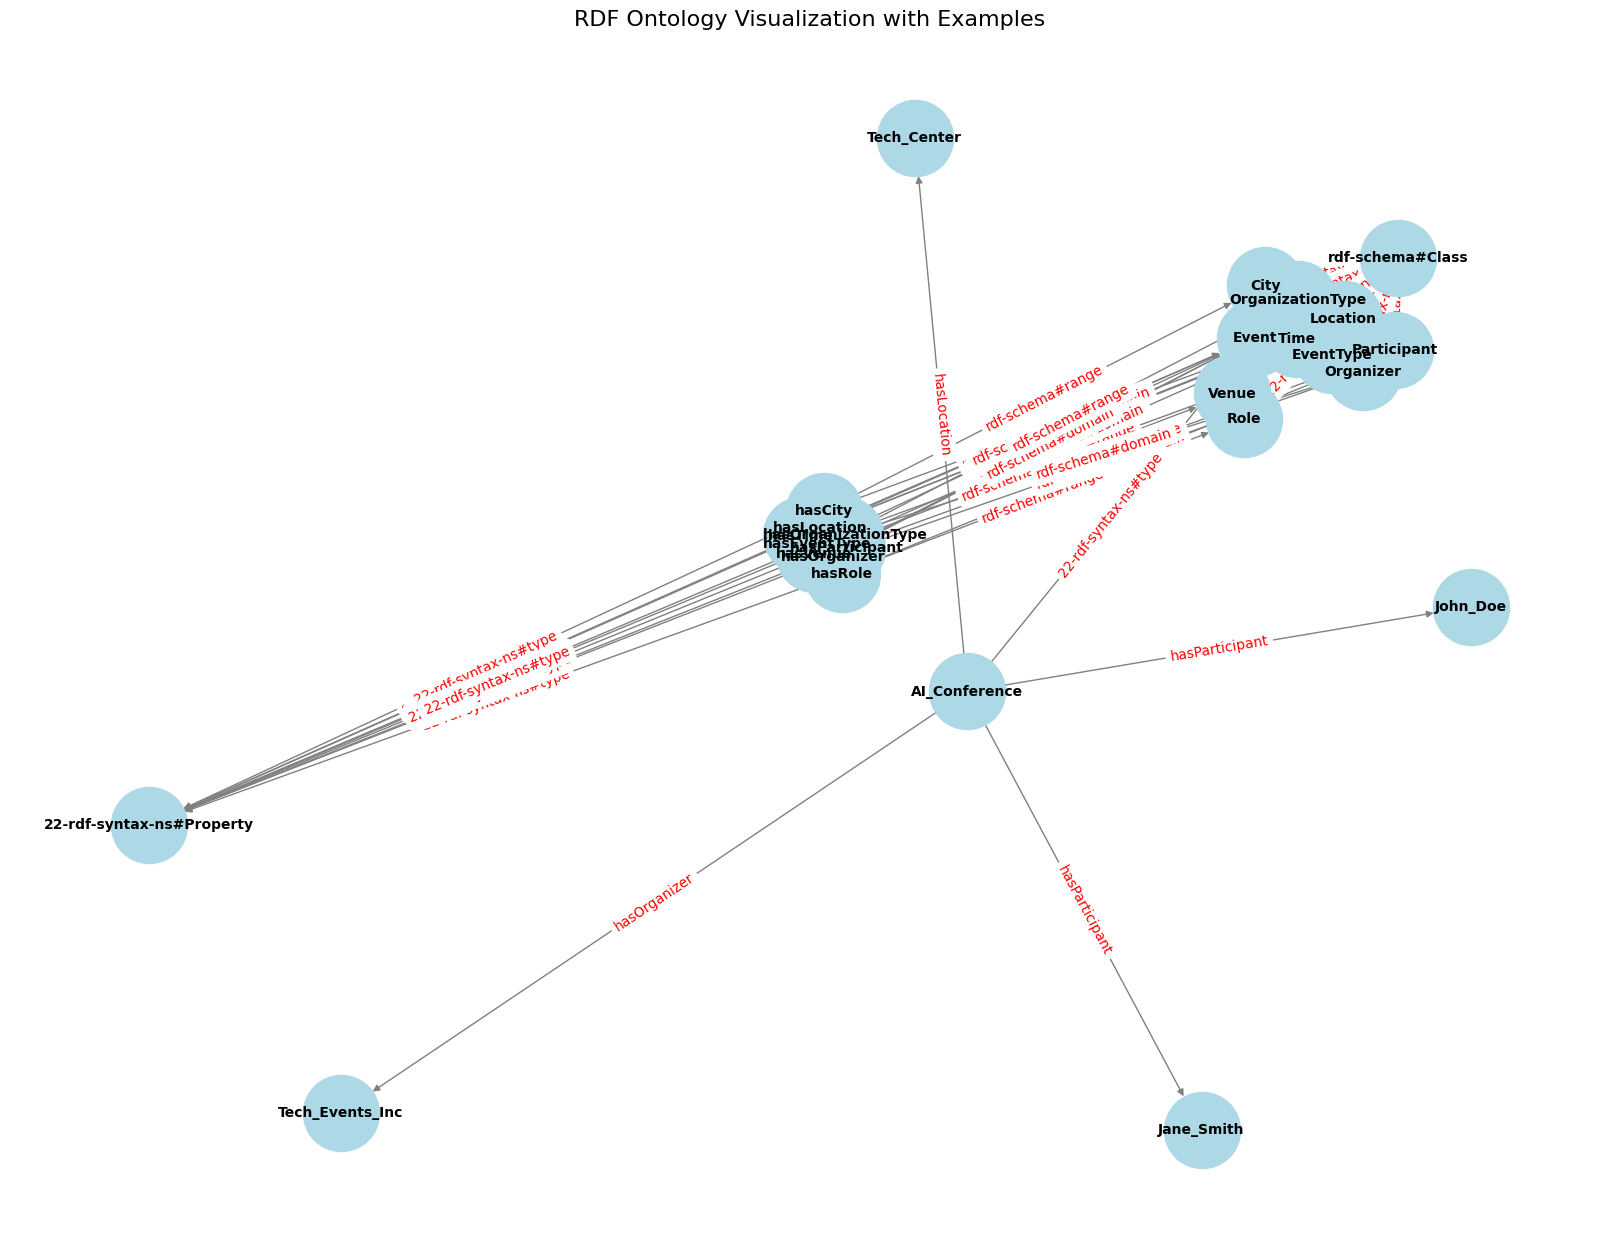

In [ ]:
# Gerekli kütüphaneleri yükle
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()
# Gerekli kütüphaneleri yükle
!pip install rdflib networkx matplotlib

import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (örnekleri de düğüm olarak ekle)
for subj, pred, obj in g:
    # Sınıf (Class) ilişkilerinden örnekleri bağlamak
    if isinstance(subj, rdflib.term.URIRef) and isinstance(obj, rdflib.term.URIRef):
        G.add_edge(subj.split('/')[-1], obj.split('/')[-1], label=pred.split('/')[-1])

# Grafik düzeni oluştur
pos = nx.spring_layout(G)

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()


# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (örnekleri de düğüm olarak ekle)
for subj, pred, obj in g:
    # Sınıf (Class) ilişkilerinden örnekleri bağlamak
    if isinstance(subj, rdflib.term.URIRef) and isinstance(obj, rdflib.term.URIRef):
        G.add_edge(subj.split('/')[-1], obj.split('/')[-1], label=pred.split('/')[-1])

# Grafik düzeni oluştur
pos = nx.spring_layout(G)

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray"
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()


RDF verisi yüklenirken hata oluştu: at line 61 of <>:
Bad syntax (expected directive or statement) at ^ in:
"...b'n_Doe, ex:Jane_Smith ;\n    ex:hasOrganizer ex:Tech_Events_In'^b'c. .\n\nex:Blockchain_Summit a ex:Event ;\n    ex:hasLocation e'..."


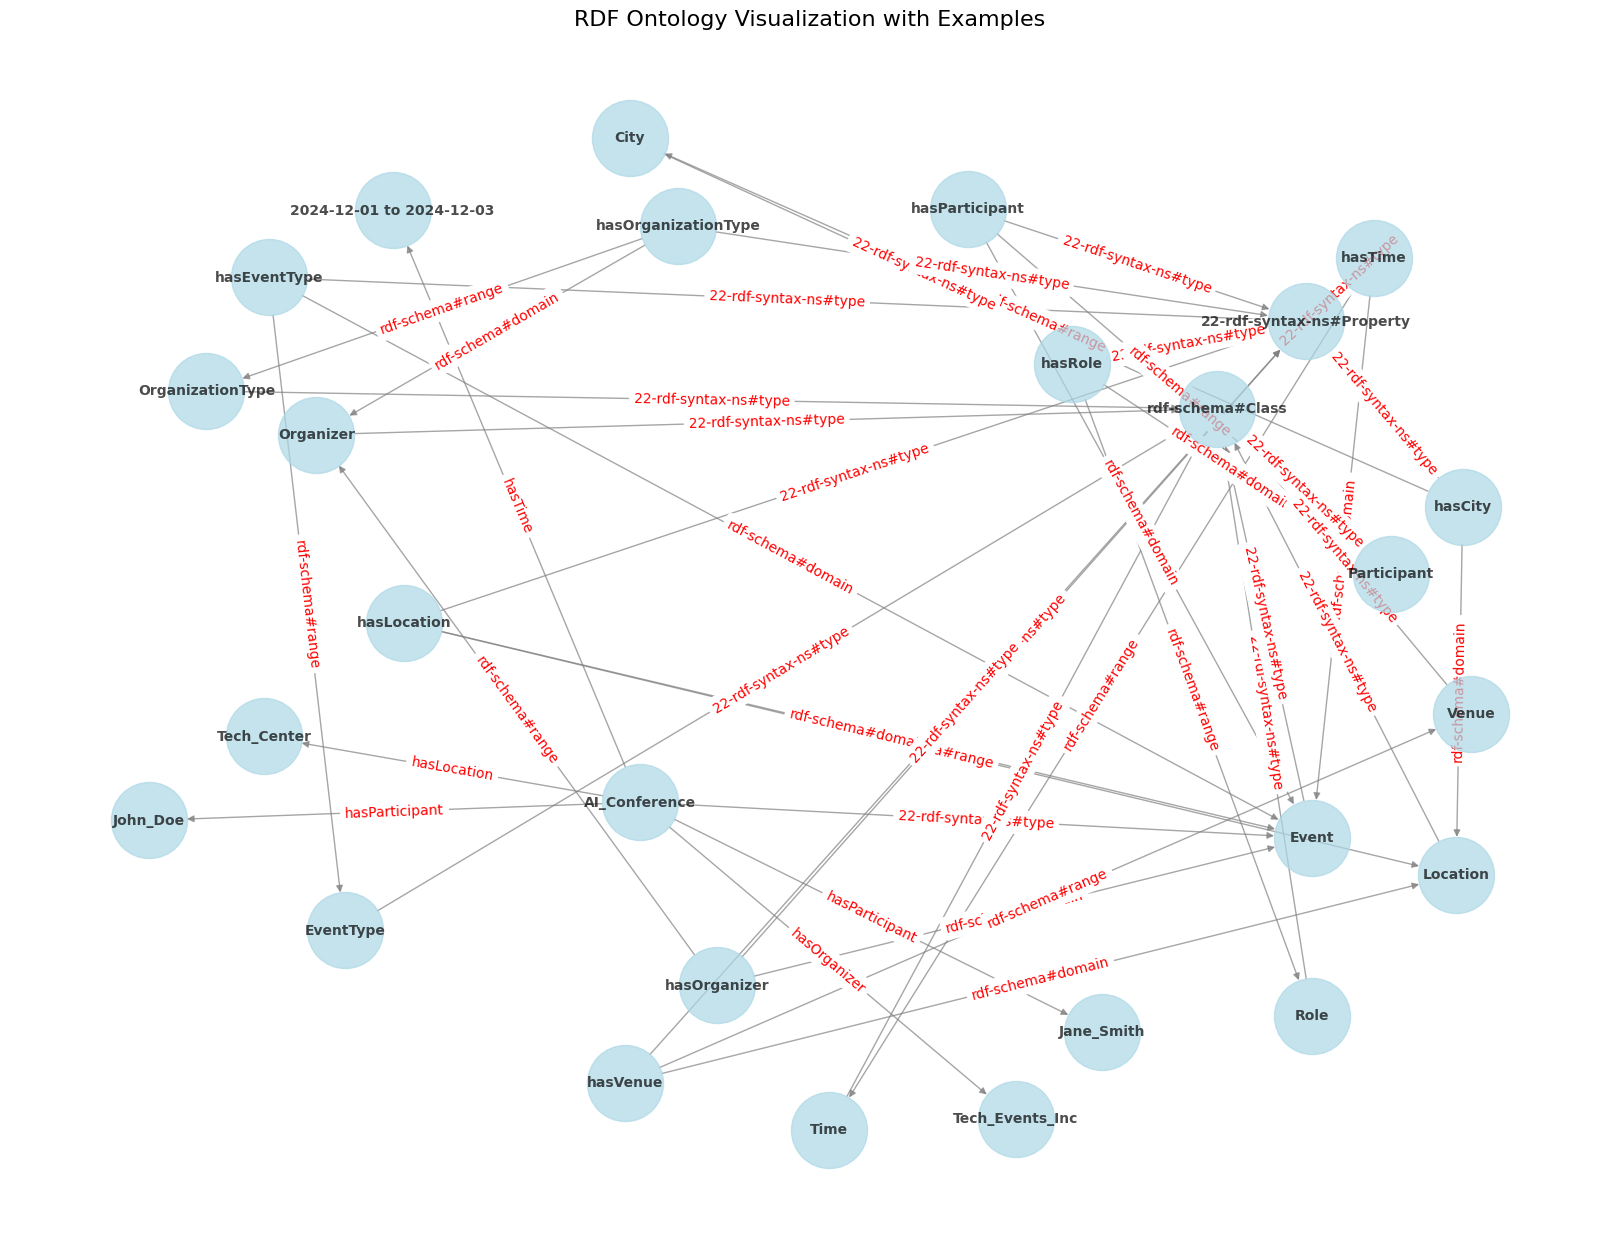

In [29]:
#SON HALİ

# Gerekli kütüphaneleri yükle
!pip install rdflib networkx matplotlib

import rdflib
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph

# RDF verisini Turtle formatında tanımla (örneklerle)
rdf_data = """
@prefix ex: <http://example.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

# Classes
ex:Event a rdfs:Class .
ex:Location a rdfs:Class .
ex:Time a rdfs:Class .
ex:Participant a rdfs:Class .
ex:Organizer a rdfs:Class .
ex:EventType a rdfs:Class .
ex:City a rdfs:Class .
ex:Venue a rdfs:Class .
ex:Role a rdfs:Class .
ex:OrganizationType a rdfs:Class .

# Properties (Bağlantı isimlendirmelerini daha anlamlı hale getirme)
ex:hasLocation a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Location .

ex:hasTime a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Time .

ex:hasParticipant a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Participant .

ex:hasOrganizer a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:Organizer .

ex:hasEventType a rdf:Property ;
    rdfs:domain ex:Event ;
    rdfs:range ex:EventType .

ex:hasCity a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:City .

ex:hasVenue a rdf:Property ;
    rdfs:domain ex:Location ;
    rdfs:range ex:Venue .

ex:hasRole a rdf:Property ;
    rdfs:domain ex:Participant ;
    rdfs:range ex:Role .

ex:hasOrganizationType a rdf:Property ;
    rdfs:domain ex:Organizer ;
    rdfs:range ex:OrganizationType .

# Instances
ex:AI_Conference a ex:Event ;
    ex:hasLocation ex:Tech_Center ;
    ex:hasTime "2024-12-01 to 2024-12-03"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Jane_Smith ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Blockchain_Summit a ex:Event ;
    ex:hasLocation ex:Innovation_Hub ;
    ex:hasTime "2025-01-10 to 2025-01-12"^^xsd:string ;
    ex:hasParticipant ex:John_Doe, ex:Alice_Brown ;
    ex:hasOrganizer ex:Tech_Events_Inc. .

ex:Music_Festival a ex:Event ;
    ex:hasLocation ex:Concert_Hall ;
    ex:hasTime "2025-02-15 to 2025-02-16"^^xsd:string ;
    ex:hasParticipant ex:Alice_Brown ;
    ex:hasOrganizer ex:Music_Mania_Org .

ex:Tech_Center a ex:Location ;
    ex:hasCity ex:New_York .

ex:Concert_Hall a ex:Location ;
    ex:hasCity ex:Los_Angeles .

ex:Innovation_Hub a ex:Location ;
    ex:hasCity ex:San_Francisco .

ex:John_Doe a ex:Participant .
ex:Jane_Smith a ex:Participant .
ex:Alice_Brown a ex:Participant .

ex:Tech_Events_Inc a ex:Organizer .
ex:Music_Mania_Org a ex:Organizer .
"""

# RDF grafiği oluştur ve veriyi yükle
g = Graph()

# RDF verisini doğru formatta işleme
try:
    g.parse(data=rdf_data, format="turtle")
    print("RDF verisi başarıyla yüklendi.")
except Exception as e:
    print(f"RDF verisi yüklenirken hata oluştu: {e}")

# NetworkX grafiği oluştur
G = nx.DiGraph()

# RDF üçlülerini ekle (bağlantı isimlendirmelerini daha anlaşılır hale getir)
for subj, pred, obj in g:
    # URI'lerden sadece isim kısmını almak
    subj_name = subj.split('/')[-1]
    obj_name = obj.split('/')[-1]
    pred_name = pred.split('/')[-1]

    # Bağlantıları eklerken daha anlaşılır isimler kullan
    G.add_edge(subj_name, obj_name, label=pred_name)

# Grafik düzeni oluştur
pos = nx.spring_layout(G, k=1.0, iterations=20)  # k parametresi ile daha açık ve düzgün bir düzen sağlanabilir

# Grafiği çiz
plt.figure(figsize=(16, 12))
nx.draw(
    G, pos, with_labels=True, node_size=3000, node_color="lightblue",
    font_size=10, font_weight="bold", edge_color="gray", alpha=0.7
)

# Kenar etiketlerini çiz
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red", font_size=10)

# Başlık ve göster
plt.title("RDF Ontology Visualization with Examples", fontsize=16)
plt.show()
